In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=tf.keras.datasets.fashion_mnist

In [3]:
(training_images,training_labels),(test_images,test_labels)=dataset.load_data()

Label: 9
image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

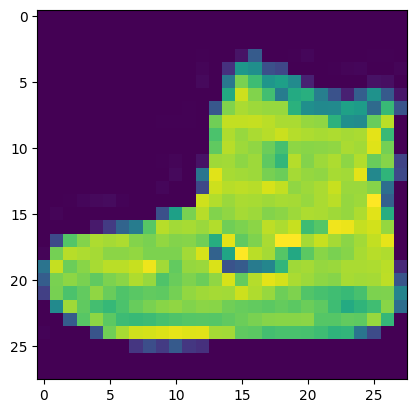

In [4]:
np.set_printoptions(linewidth=320)
print("Label:",training_labels[0])
print("image:\n",training_images[0])
plt.imshow(training_images[0])

In [5]:
training_images=training_images/255
test_images=test_images/255

In [6]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [7]:
inputs=np.array([[1.0,3.0,4.0,2.0,8.0]])
inputs=tf.convert_to_tensor(inputs)
print(inputs.numpy())

outputs=tf.keras.activations.softmax(inputs)
print(outputs.numpy())

sum=tf.reduce_sum(outputs)
print(sum.numpy())

prediction=np.argmax(outputs)
print(prediction)

[[1. 3. 4. 2. 8.]]
[[8.86661569e-04 6.55159207e-03 1.78090737e-02 2.41019603e-03 9.72342477e-01]]
1.0
4


In [8]:
model.compile(optimizer=tf.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 14s 6ms/step - loss: 0.5033 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3780 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3413 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3154 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2971 - accuracy: 0.8905


In [9]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3619 - accuracy: 0.8671


[0.36191070079803467, 0.8671000003814697]

In [10]:
classifications=model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 2s 5ms/step
[1.20765242e-06 1.25475044e-08 2.68668714e-07 2.19513055e-07 1.09560396e-07 2.31332215e-03 3.95770485e-06 1.97473913e-02 1.28509433e-04 9.77805018e-01]


In [11]:
print(test_labels[0])

9


In [12]:
famnist=tf.keras.datasets.fashion_mnist
(train_im,train_lb),(test_im,test_lb)=famnist.load_data()
train_im=train_im/255.0
test_im=test_im/255.0

model2=tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(512,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model2.fit(train_im,train_lb,epochs=5)
model2.evaluate(test_im,test_lb)
classification2=model2.predict(test_im)
print(classification2[0])
print(test_lb[0])


Epoch 1/5
1875/1875 [==============================] - 21s 9ms/step - loss: 0.4695
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3567
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3226
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2975
Epoch 5/5
313/313 [==============================] - 2s 4ms/step
[3.5745572e-06 2.2165759e-08 1.0067042e-06 1.4806274e-08 1.9406497e-07 2.2636518e-02 2.1573164e-06 2.4891333e-01 2.0138223e-06 7.2844130e-01]
9


In [15]:
model2.evaluate(test_im,test_lb)

313/313 [==============================] - 2s 6ms/step - loss: 0.3534


0.35344111919403076

In [19]:
class my_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):

        if(logs.get('loss')<0.4):
            print("\nepoch is less than 0.4 so epoch is stoping")
            self.model.stop_training=True
callbacks=my_callback()

In [20]:
model2.fit(train_im,train_lb,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2529
epoch is less than 0.4 so epoch is stoping
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2529


In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [23]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
